In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn import  metrics
%matplotlib inline


**1 LOAD THE DATASET INTO COLLAB**

In [2]:
df=pd.read_csv("/content/abalone.csv")

In [3]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

**1 UNIVARIATE ANALYSIS**



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b5364b90>,
      dtype=object)

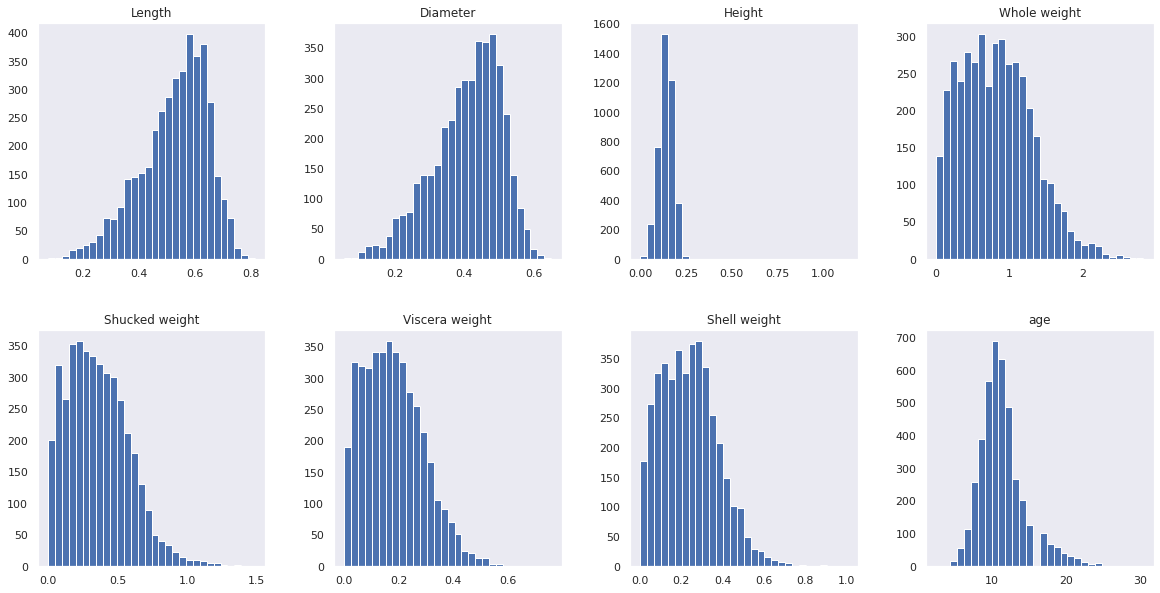

In [4]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [5]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


2 BIVARIATE ANALYSIS & MULTIVARIATE ANALYSIS

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  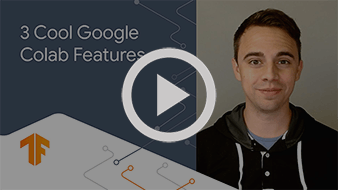
  </a>
</center>

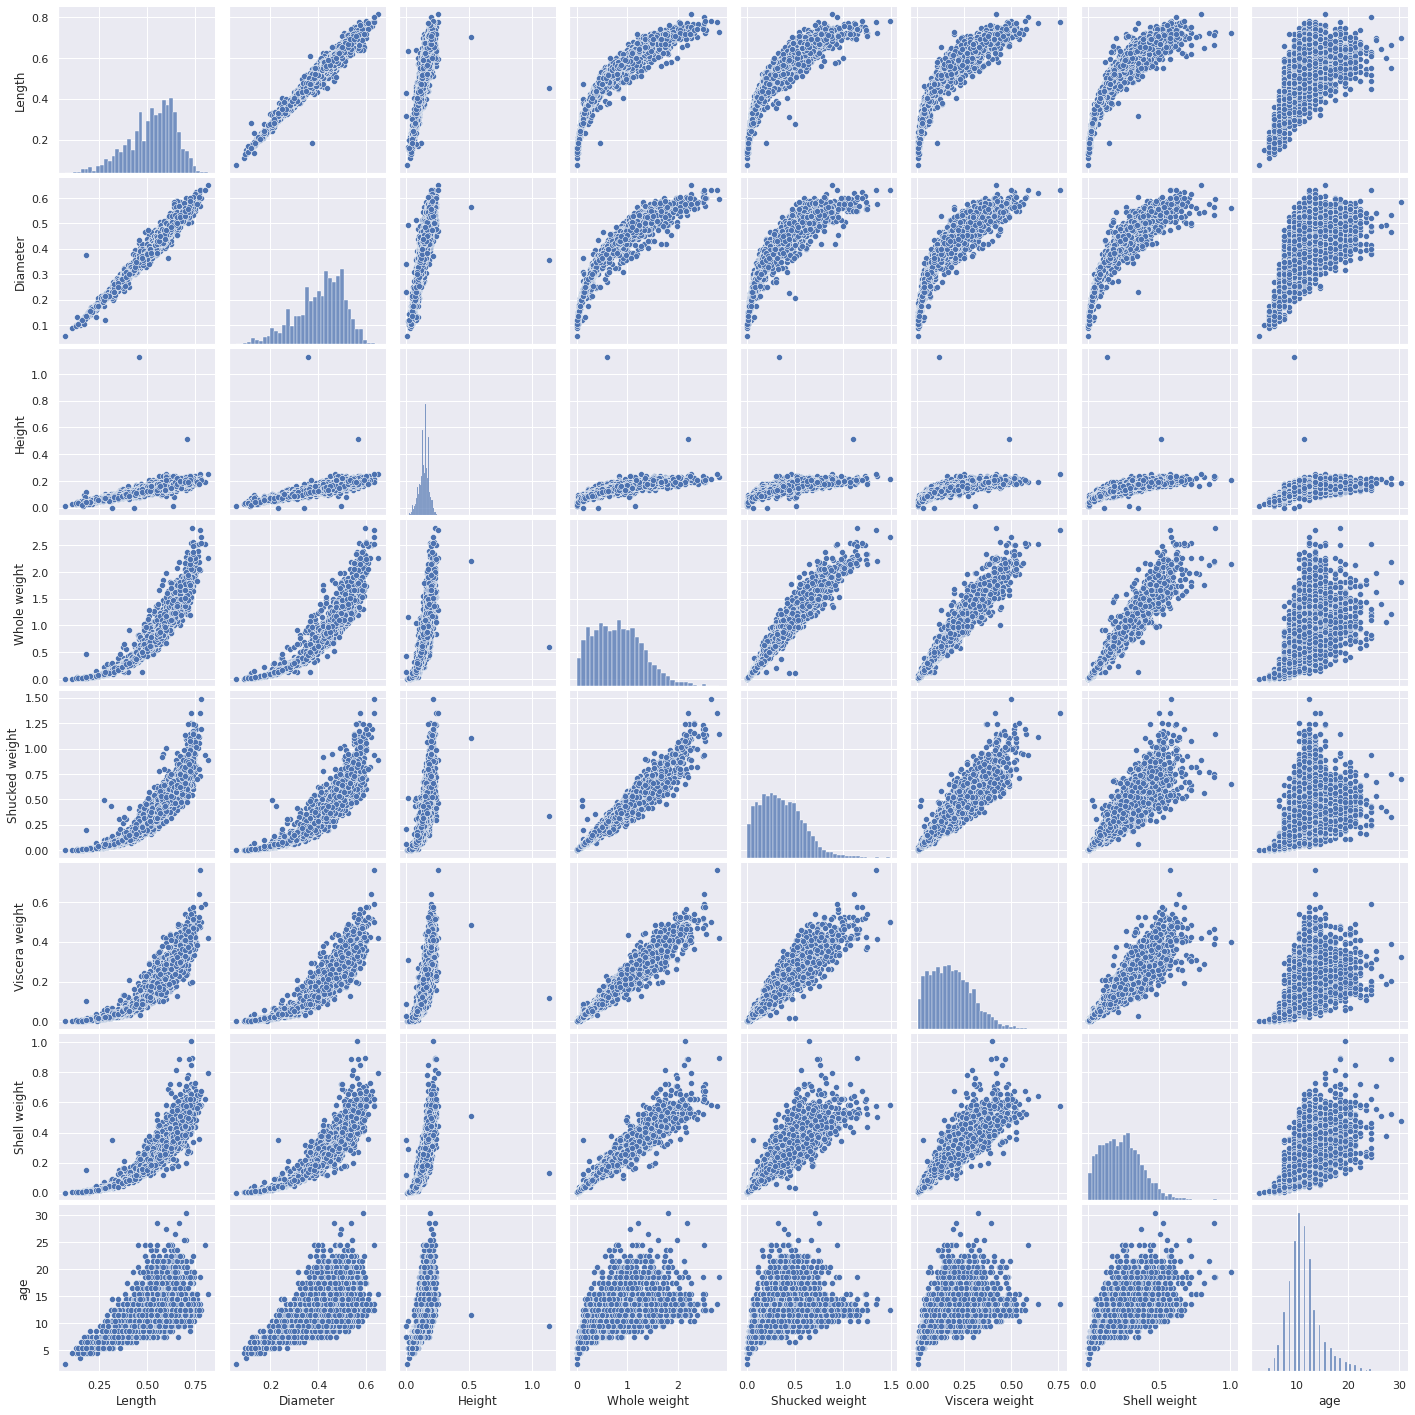

In [6]:
numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])


4 Perform descriptive statistics on the dataset

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


5. Check for Missing values

In [8]:
df.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

6. Find the outliers and replace them outliers

In [9]:
df = pd.get_dummies(df)
dummy_data = df.copy()

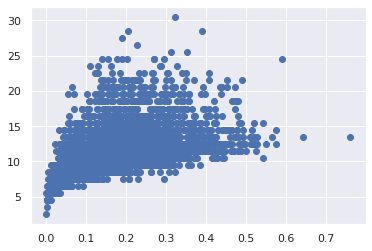

In [10]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [11]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

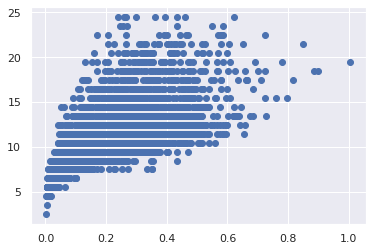

In [12]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)
#Outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

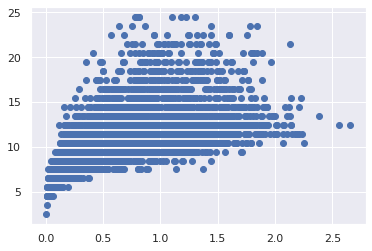

In [13]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

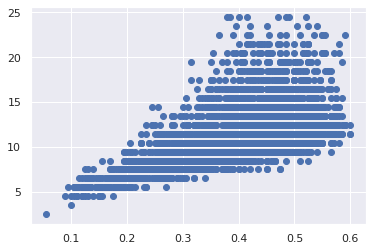

In [14]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

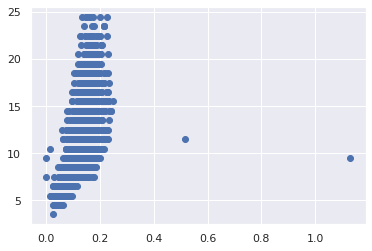

In [15]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

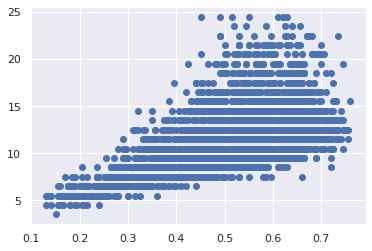

In [16]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

7. Check for Categorical columns and perform encoding.

<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

In [17]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [18]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [19]:
categorical_features

Index([], dtype='object')

ENCODING

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())

0.550    93
0.575    93
0.625    93
0.580    92
0.600    86
         ..
0.755     2
0.220     2
0.150     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


8 split the data
into dependent and independent variables



In [21]:
x=df.iloc[:,:5]
x

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [22]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


9 Scale the independent varibles

In [23]:
#Scaling the Independent Variables
print ("\n ORIGINAL VALUES: \n\n", x,y)


 ORIGINAL VALUES: 

       Length  Diameter  Height  Whole weight  Shucked weight
0      0.455     0.365   0.095        0.5140          0.2245
1      0.350     0.265   0.090        0.2255          0.0995
2      0.530     0.420   0.135        0.6770          0.2565
3      0.440     0.365   0.125        0.5160          0.2155
4      0.330     0.255   0.080        0.2050          0.0895
...      ...       ...     ...           ...             ...
4172   0.565     0.450   0.165        0.8870          0.3700
4173   0.590     0.440   0.135        0.9660          0.4390
4174   0.600     0.475   0.205        1.1760          0.5255
4175   0.625     0.485   0.150        1.0945          0.5310
4176   0.710     0.555   0.195        1.9485          0.9455

[4096 rows x 5 columns]       Viscera weight  Shell weight   age  Sex_F  Sex_I  Sex_M
0             0.1010        0.1500  16.5      0      0      1
1             0.0485        0.0700   8.5      0      0      1
2             0.1415        0.2100 

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_y= min_max_scaler.fit_transform(x,y) 
print ("\n VALUES AFTER MIN MAX SCALING: \n\n", new_y)


 VALUES AFTER MIN MAX SCALING: 

 [[0.51587302 0.54545455 0.38       0.21240245 0.16338656]
 [0.34920635 0.34343434 0.36       0.09069816 0.07055329]
 [0.63492063 0.65656566 0.54       0.28116431 0.18715188]
 ...
 [0.74603175 0.76767677 0.82       0.49166842 0.38692908]
 [0.78571429 0.78787879 0.6        0.45728749 0.39101374]
 [0.92063492 0.92929293 0.78       0.81754904 0.69884887]]


10 Split the data into training and testing

In [25]:
#Split the data into Training and Testing
X = df.drop('age', axis = 1)
y = df['age']

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
X_train

array([[0.405, 0.3  , 0.09 , ..., 0.   , 1.   , 0.   ],
       [0.36 , 0.26 , 0.09 , ..., 0.   , 1.   , 0.   ],
       [0.56 , 0.43 , 0.15 , ..., 1.   , 0.   , 0.   ],
       ...,
       [0.36 , 0.3  , 0.085, ..., 0.   , 1.   , 0.   ],
       [0.56 , 0.425, 0.145, ..., 0.   , 1.   , 0.   ],
       [0.71 , 0.5  , 0.15 , ..., 1.   , 0.   , 0.   ]])

In [28]:
y_train

2730     7.5
175      8.5
118     10.5
2920    11.5
1828     8.5
        ... 
3435     8.5
2104    12.5
819      8.5
1321    10.5
2086    11.5
Name: age, Length: 3072, dtype: float64

11 Build the Model

In [29]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

In [30]:
accuracy = model.score(X_train, y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.5313433843867599


# Train the Model

In [32]:
#Training the model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_train_pred

array([ 8.45124253,  8.89131493, 13.51252939, ...,  8.58602473,
       11.24210845,  9.66242917])

In [34]:
X_train

array([[0.405, 0.3  , 0.09 , ..., 0.   , 1.   , 0.   ],
       [0.36 , 0.26 , 0.09 , ..., 0.   , 1.   , 0.   ],
       [0.56 , 0.43 , 0.15 , ..., 1.   , 0.   , 0.   ],
       ...,
       [0.36 , 0.3  , 0.085, ..., 0.   , 1.   , 0.   ],
       [0.56 , 0.425, 0.145, ..., 0.   , 1.   , 0.   ],
       [0.71 , 0.5  , 0.15 , ..., 1.   , 0.   , 0.   ]])

In [35]:
y_train

2730     7.5
175      8.5
118     10.5
2920    11.5
1828     8.5
        ... 
3435     8.5
2104    12.5
819      8.5
1321    10.5
2086    11.5
Name: age, Length: 3072, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

Mean Squared error of training set :4.382304


13 Test the Model

In [37]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [40]:
y_test_pred

array([ 8.56993836, 14.51638386, 12.8254927 , ...,  9.481891  ,
       13.71058056, 13.46373092])

In [41]:
X_test

array([[0.42 , 0.305, 0.1  , ..., 0.   , 1.   , 0.   ],
       [0.58 , 0.455, 0.155, ..., 1.   , 0.   , 0.   ],
       [0.585, 0.465, 0.165, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.58 , 0.49 , 0.13 , ..., 0.   , 0.   , 1.   ],
       [0.485, 0.4  , 0.155, ..., 1.   , 0.   , 0.   ],
       [0.61 , 0.48 , 0.17 , ..., 0.   , 0.   , 1.   ]])

In [42]:
y_test

4107     8.5
318     19.5
2776    11.5
1358    12.5
1486    10.5
        ... 
356     14.5
3711    12.5
995     10.5
3854    12.5
1367    11.5
Name: age, Length: 1024, dtype: float64

In [43]:
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of testing set :5.011009


14 Measure the performance using Metrics

In [44]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

R2 Score of training set:0.53


In [45]:
from sklearn.metrics import r2_score
p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.53


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

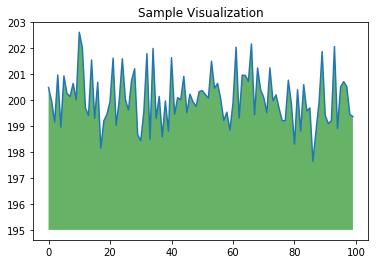

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
